# Harjoitus 3
## Tehtävä 1

Aloitetaan valitsemalla verkkokauppadatasta haluttu osajoukko (GROUP = 2).

In [1]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt

df_brands, meta = pyreadstat.read_sav("../data/brands.sav")
df_brands.columns = meta.column_labels  # sarakkeiden nimeäminen järkeviksi

df_group_2 = df_brands[df_brands["Group"] == 2]

### a)

Valitaan Ikean verkkokauppaa koskevat sarakkeet hallinnan ja frustraation tunteet. Tarkastellaan näiden välistä korrelaatiota ensin visuaalisesti.

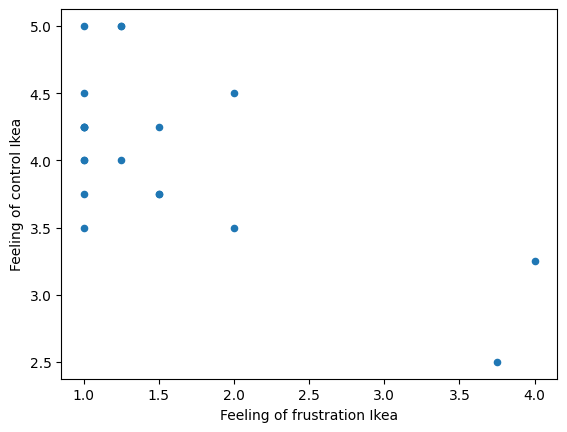

In [2]:
ikea_frust_cont = df_group_2[["Feeling of control Ikea", "Feeling of frustration Ikea"]]
ikea_frust_cont.plot(kind="scatter", y="Feeling of control Ikea", x="Feeling of frustration Ikea")
plt.show()

Koska otanta on hyvin pieni, on vaikea sanoa onko kahden tutkittavan muuttujan korrelaatio lineaarista vaiko ei. Vaikuttaisi kuitenkin siltä, että kun frustraation tunne kasvaa, niin hallinnan tunne pienenee. Silmiä hieman siristämällä, voi tätä trendiä pitää jokseenkin lineaarisena. Poikkeavia havaintoja ei ole millään mittarilla järkevää edes miettiä näin pienellä otannalla. Valitaan siis korrelaation testaamiseksi Pearsonin tulomomenttikorrelaatiokerroin _r_.

In [3]:
from scipy.stats import pearsonr

rstat, pvalue = pearsonr(ikea_frust_cont["Feeling of control Ikea"], ikea_frust_cont["Feeling of frustration Ikea"])
# print(f"p-value = {pvalue}, Pearson r = {rstat}")

p-arvoksi saadaan .002 ja _r_ = -.65. Koska kyseessä on korrelaatio, nollahypoteesi sanoo, että havaittua korrelaatiota ei ole olemassa (ts. _r_ = 0). Koska nollahypoteesin paikkansapitävyyden todennäköisyys on pieni (p-arvo alle .05), voidaan laskettua Pearsonin kerrointa pitää tilastollisesti merkitsevänä. Eli nollahypoteesi hylätään. Koska Pearsonin _r_ on itseisarvoltaan suurempaa kuin .5, voidaan korrelaation efektin kokoa pitää suurena.

Hyväksymme vaihtoehtoisen hypoteesin, eli hallinnan tunne korreloi (kääntäen) furstraation tunteen kanssa ja tämän efektin koko on suuri. Tämä on sopusoinnussa visuaalisesti tehdyn havainnon kanssa. (Mutta muistamme edelleen pienen otannan koon ja epävarmuuden lineaarisesta korrelaatiosta...)

### b)

Valitaan taas oleellinen data ja tarkastellaan tätä aluksi visuaalisesti.

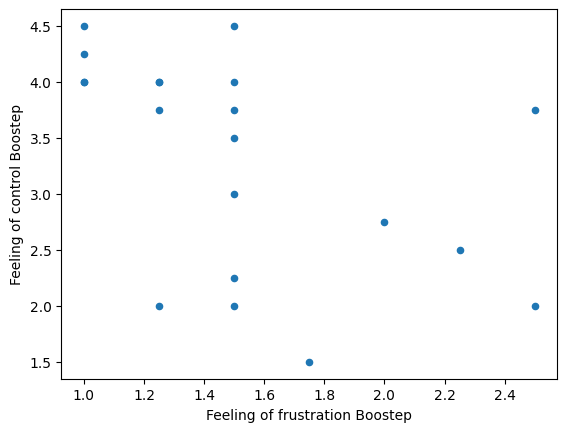

In [4]:
boostep_frust_cont = df_group_2[["Feeling of control Boostep", "Feeling of frustration Boostep"]]
boostep_frust_cont.plot(kind="scatter", y="Feeling of control Boostep", x="Feeling of frustration Boostep")
plt.show()

Visuaalisesti tarkastelemalla frustraation ja hallinnan tunteen korrelaatiota Boostepin tapauksessa, voidaan tätä pitää myös jokseenkin lineaarisena. Pientä trendiä on havaittavissa, jossa hallinnan tunne pienenee, kun frustraation tunne kasvaa. Tutkitaan korrelaatiota vielä tilastolliseti Pearsonin kerrointa hyödyntäen.

In [5]:
rstat, pvalue = pearsonr(boostep_frust_cont["Feeling of control Boostep"], boostep_frust_cont["Feeling of frustration Boostep"])
# print(f"p-value = {pvalue}, Pearson r = {rstat}")

p-arvoksi saadan .03 ja _r_ = -.48. Huomataan, että p-arvo on nyt suurempi, kuin Ikean kohdalla. Jos pidämme tilastollisen merkitsevyyden rajana edelleen 5% (.05), niin korrelaatiota voidaan pitää tilastollisesti merkitsevänä ja nollahypoteesi (korrelaatiota ei ole) hylätään. Itse korrelaatio on _r_ = -.48, eli hallinnan tunne korreloi kääntäen frustraation tunteen kanssa. Efektin suuruus on keskisuuri (.3 > |_r_| < .5).

Hyväksymme vaihtoehtoisen hypoteesin, eli hallinnan tunne korreloi (kääntäen) furstraation tunteen kanssa ja efektin koko on keskisuuri. Tämä antaa tukea visuaalisesti tehdylle havainnolle. Muistamme kuitenkin edelleen otannan koon olevan pieni.

### c)

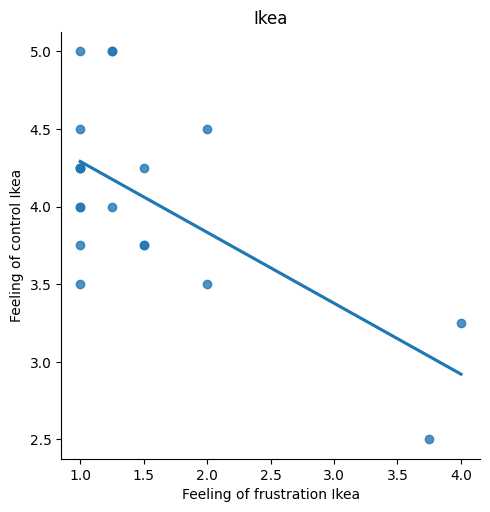

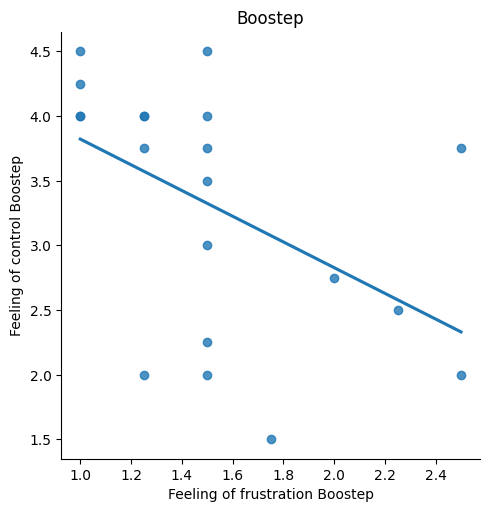

In [6]:
import seaborn as sns

sns.lmplot(y="Feeling of control Ikea", x="Feeling of frustration Ikea", data=ikea_frust_cont, fit_reg=True, ci=None)
plt.title("Ikea")
plt.show()

sns.lmplot(y="Feeling of control Boostep", x="Feeling of frustration Boostep", data=boostep_frust_cont, fit_reg=True, ci=None)
plt.title("Boostep")
plt.show()

Yllä olevia kuvioita tarkastelemalla huomataan seuraavaa. Mikäli Ikean kohdalla ei olisi kahta oikeinpuolemmaista havaintoa, voisi korrelaatio olla myös positiivista, eli frustraation tunne kasvaa hallinnan tunteen kasvaessa. Eli nämä kaksi havaintoa (tai mahdollisesti usaempi, jos pisteitä on päällekkäin) ovat merkittävässä roolissa havaitun ilmiön kannalta. Jos Ikean data jaettaisiin kahtia frustraation tunteet kohdalta 2.5, ja korrelaatiota tarkasteltaisiin näiden kahden datasetin kohdalla erikseen, saisimme todennäköisesti positiivista korrelaatiota frustraation ja hallinnan tunteen välille. Eli tässä olisi hyvä esimerkki siitä, että kun otannan osioita tarkastellaan erikseen korrelaation kannalta, voi tulos olla täysin päinvastainen verrattuna siihen, kun koko dataa tarkastellaan yhtenä kokonaisuutena. Tämä ilmiö tunnetaan myös Simpsonin paradoksina.

Boostepin kohdalla ei ainakaan ensisilmäyksellä huomaa poikkeavia havaintoja, jotka olisivat merkittävässä roolissa havaitun korrelaation kannalta. Kuitenkin kuvion oikeassa yläkulmassa oleva piste saattaa heikentää korrelaatiota, sillä ilman tätä pistettä, trendi olisi ehkä hieman selkeämpi. 

## Tehtävä 2

Ladataan tiedebarometridata ja valitaan siihen listatut väittämät (q9_8.uusi, q9_9.uusi, q9_13.uusi, q9_21.uusi, q9_23.uusi, q9_25.uusi, q9_29.uusi, q9_30.uusi, q9_40.uusi).

In [7]:
df_baro, meta_baro = pyreadstat.read_sav("../data/tiede_baro_2019.sav")
questions = ["q9_8.uusi", "q9_9.uusi", "q9_13.uusi", "q9_21.uusi", "q9_23.uusi", "q9_25.uusi", "q9_29.uusi", "q9_30.uusi", "q9_40.uusi"]
df_faktori = df_baro[questions].dropna()

#print(f"Tiputettuja rivejä (joissa yksi tai useampi puuttuva datapiste: {df_baro.shape[0] - df_faktori.shape[0]} (N={df_baro.shape[0]})")
#print(f"Rivejä per tarkasteltava väittämä: {df_faktori.shape[0] / 9} (N={df_faktori.shape[0]})")

Huomataan, että datasta on tiputettu n. puolet riveistä (1189 kpl) puuttuvan mittauksen takia. Jos pienin otoskoko oletetaan olevan `N = 5 x muuttujien lkm`, niin tällöin pienin järkevä otoskoko eksploratiivisen faktorianalyysin toteuttamiseksi olisi N=45. Otoskokomme on onneksi paljon suurempi (N=1020), joten otoskoko on tarpeeksi suuri eksploratiivisen faktorianalyysin mielekkyyden kannalta. Lisäksi muuttujat ovat järjestysasteikollisia. Tarkastellaan vielä muuttujien välistä korrelaatiota, eli onko sellaista havaittavissa, korrelaatiomatriisin avulla:

In [8]:
df_faktori.corr()

,q9_8.uusi,q9_9.uusi,q9_13.uusi,q9_21.uusi,q9_23.uusi,q9_25.uusi,q9_29.uusi,q9_30.uusi,q9_40.uusi
q9_8.uusi,1.000000,-0.098258,-0.157710,0.425099,0.089303,0.258709,0.467125,-0.154484,-0.242131
q9_9.uusi,-0.098258,1.000000,0.548892,-0.185927,-0.361421,-0.441818,-0.199640,0.505472,0.255024
q9_13.uusi,-0.157710,0.548892,1.000000,-0.212693,-0.307419,-0.407407,-0.228219,0.469713,0.269128
q9_21.uusi,0.425099,-0.185927,-0.212693,1.000000,0.187375,0.282018,0.409001,-0.235400,-0.219329
q9_23.uusi,0.089303,-0.361421,-0.307419,0.187375,1.000000,0.404139,0.122313,-0.307169,-0.070649
q9_25.uusi,0.258709,-0.441818,-0.407407,0.282018,0.404139,1.000000,0.257811,-0.547692,-0.256361
q9_29.uusi,0.467125,-0.199640,-0.228219,0.409001,0.122313,0.257811,1.000000,-0.244286,-0.388870
q9_30.uusi,-0.154484,0.505472,0.469713,-0.235400,-0.307169,-0.547692,-0.244286,1.000000,0.242836
q9_40.uusi,-0.242131,0.255024,0.269128,-0.219329,-0.070649,-0.256361,-0.388870,0.242836,1.000000


Korrelaatiomatriisista voidaan havaita, että jonkinlaista korrelaatiota on havaittavissa, mutta se ei ole erityisen vahvaa (> .9) tai erityisen heikkoa (< .1) suurimmassa osassa tapauksia. Kysymysten q9_9 ja q9_8, q9_23 ja q9_8, q9_40 ja q9_23, q9_8 ja q9_23, sekä q9_40 ja q9_23, välillä korrelaatio on kuitenkin heikkoa (< .1). Näiden havaintojen perusteella, voidaan korrelaatiota tutkittavien muuttujien välillä pitää laadullisesti riittävänä eksploratiivisen faktorianalyysin toteuttamisen kannalta.

Vaikka tehtävänannossa oli jo nimetty kaksi latenttimuuttujaa, tarkastellaan vielä ominaisarvoja.

In [9]:
from factor_analyzer.factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

analyzer = FactorAnalyzer(rotation="varimax", n_factors=2)  # vaikka tässä määritetään latenttimuutujienl lkm 2, se ei vaikuta ominaisarvojen laskemisessa.
analyzer.fit(df_faktori)
ev, _ = analyzer.get_eigenvalues()
#print(f"Ominaisarvot: {ev}")

Ominaisarvoista kaksi (3.38 ja 1.50) olivat suurempaa, kuin 1, mikä viittaa siihen, että latentteja muuttujia saattaa tosiaan olla kaksi kappaletta. Tämä tarkoittaa, että kahdella latentilla muuttujalla on parempi "ennustusarvo", kuin millään summattavilla (mitatuilla) muuttujilla yksinään. Jatketaan siis sillä oletuksella, että latenttimuuttujia on kaksi.

Tarkastellaan seuraavaksi soveltuuko data faktorianalyysiin.

In [10]:
_, kmo_total = calculate_kmo(df_faktori)
stat, pvalue = calculate_bartlett_sphericity(df_faktori)

# print(f"kmo total = {kmo_total}")
# print(f"Bartlett sphericity p-value = {pvalue}")

Koska Kaiser-Mayer-Olkin arvo on .819 (> .6), varianssien osuus datassa, joka saatta johtua latenttimuuttujista on tarpeeksi suuri faktorianalyysin mielekkyyden kannalta. Lisäksi, Bartlett p-arvo on 0, joten voimme myös hylätä nollahypoteesin, jonka mukaan tarkasteltavien muuttujien korrelaatiomatriisi olisi yksikkömatriisi. Saamme tukea vaihtoehtoiselle hypoteesille, jonka mukaan muuttujien välillä on tilastollisesti merkitsevää korrelaatiota. Näiden havaintojen perusteella tarkasteltavista muuttujista voi muodostaa faktoreita.

Tarkastellaan seuraavaksi kommunaliteettja.

In [11]:
communalities = pd.DataFrame(analyzer.get_communalities(), columns=["Extracted"], index=questions)
communalities

,Extracted
q9_8.uusi,0.457966
q9_9.uusi,0.547596
q9_13.uusi,0.452196
q9_21.uusi,0.347086
q9_23.uusi,0.236186
q9_25.uusi,0.479643
q9_29.uusi,0.522809
q9_30.uusi,0.507091
q9_40.uusi,0.216116


Kahdelle kysymykselle kommunaliteetti on alle .3 (q9_23.uusi ja q9_40.uusi), tiputetaan nämä pois faktorianalyysista ja tarkastellaan uusia kommunaliteetteja.

In [12]:
questions_dropped  = ["q9_8.uusi", "q9_9.uusi", "q9_13.uusi", "q9_21.uusi", "q9_25.uusi", "q9_29.uusi", "q9_30.uusi"]
df_faktori_dropped = df_faktori[questions_dropped]

analyzer_dropped = FactorAnalyzer(rotation="varimax", n_factors=2)
analyzer_dropped.fit(df_faktori_dropped)

communalities_dropped = pd.DataFrame(analyzer_dropped.get_communalities(), columns=["Extracted"], index=questions_dropped)
communalities_dropped

,Extracted
q9_8.uusi,0.525966
q9_9.uusi,0.543603
q9_13.uusi,0.458787
q9_21.uusi,0.375039
q9_25.uusi,0.447865
q9_29.uusi,0.429216
q9_30.uusi,0.536410


Uusissa kommunaliteeteissa ei ole enää arvoja läsnä, joiden arvo olisi alle .3. Tämän havainnon perusteella, emme poista enää kysymyksiä faktorianalyysista.

In [13]:
_, kmo_total = calculate_kmo(df_faktori_dropped)
stat, pvalue = calculate_bartlett_sphericity(df_faktori_dropped)

# print(f"kmo total = {kmo_total}")
# print(f"Bartlett sphericity p-value = {pvalue}")

Huomataan kuitenkin, että kahden kysymyksen tiputtamisen jälkeen, Kaiser-Mayer-Olkin arvo on nyt tippunut arvoon .788 (Bartlett p-arvo ei muutu). Tästä huolimatta, faktorianalyysin suorittaminen on edelleen järkevää.

Tarkastellaan seuraavaksi mitkä latenttimuuttujat selittävät havaittua varianssia.

In [14]:
facvar, propvar, cumvar = analyzer_dropped.get_factor_variance()
ev, _ = analyzer_dropped.get_eigenvalues()

# print(f"ev: {ev}")
# print(f"facvar: {propvar}")
# print(f"cumvar: {cumvar}")

Ensimmäisen faktorin ominaisarvo on nyt 2.95 ja se selittää n. 27.5% havaitusta varianssista. Toisen faktorin ominaisarvo on nyt 1.41 ja se selittää n. 19.9% varianssista. Yhdessä faktorit selittävät 47.4% havaitusta varianssista, mikä on faktorianalyysin kannalta riittävää.

Tarkastellaan latauksia.

In [15]:
loadings = pd.DataFrame(analyzer_dropped.loadings_, columns=["Factor 1", "Factor 2"], index=questions_dropped)
loadings.sort_values(by="Factor 1", key=abs)

,Factor 1,Factor 2
q9_8.uusi,-0.062815,0.722509
q9_29.uusi,-0.186975,0.627898
q9_21.uusi,-0.191498,0.581693
q9_25.uusi,-0.608275,0.279045
q9_13.uusi,0.660308,-0.150930
q9_30.uusi,0.711276,-0.174634
q9_9.uusi,0.733058,-0.078926


Ensimmäiseen faktoriin latautuvat kysymykset q9_25 (-.61, .28), q9_13 (.66, -.15), q9_30 (.71, -.17) ja q9_9 (.73, -.08), missä suluissa on ilmoitettu (1. faktorin lataus, 2. faktorin lataus). Kysymyksien sisältö oli seuraava:

- q9_25: _Tieteeseen ei voi luottaa, koska saman alan asiantuntijat voivat olla jostakin asiasta täysin eri mieltä_
- q9_13: _Vaikka tieteellinen tutkimustoiminta vaatii paljon taloudellisia voimavaroja, siihen panostaminen antaa yhteiskunnalle korkean koron_
- q9_30: _Ristiriitaisetkin näkemykset kuuluvat tieteeseen (eikä asiantuntijoiden erimielisyys siten kerro tieteen epäluotettavuudesta)_
- q9_9: _Vaikka ns. perustutkimuksesta ei saada suoraa taloudellista hyötyä, se on elintärkeää, koska se on kaiken soveltavan tutkimuksen edellytys_

Vastaavasti 2. faktoriin latautuvat kysymykset q9_8 (-.06, .72) q9_29 (-.19, .63) ja q9_21 (-.19, .58). Näiden kysymysten sisältö oli seuraava:

- q9_8: _Ns. kansanparantajat omaavat tietoja ja taitoja, joita lääketieteellä ei ole_
- q9_29: _Luontaislääkkeet ovat monissa tapauksissa parempia kuin lääkärien määräämät apteekkilääkkeet_
- q9_21: _Vaikka lehdissä julkaistavat horoskoopit ovat lähinnä viihdettä, on olemassa myös luotettavia, syvälliseen astrologiseen tietoon perustuvia horoskooppeja_

Latauksien arvojen mukaan, rajatapauksia, joissa kysymys voisi latautua uskottavasti jompaan kumpaan faktoriin, ei havaittu. Laadullisesti tarkasteltuna, kahden löydetyn faktorin selitykset voisivat olla esimerkiksi:

- Faktori 1: Tieteen uskottavuus ja sen taloudellinen kannattavuus.
- Faktori 2: Asenne epätieteellisiä ilmiöitä kohtaan.

Tehtävänannossa oli postuloitu faktorit "asenne tiedettä kohtaan" ja "asenne vaihtoehtoisia ja ei-tieteellisiä ilmiöitä kohtaan". Eksploratiivisen faktorianalyysin perusteella löydetyt tekijät ovat samalla linjalla näiden postuloitujen teemojen kanssa. Tässä vaiheessa voisi myös miettiä mikäli ensimmäisen faktorin voisi vielä jakaa kahteen, eli vaikkapa "luottamus tieteeseen (q9_25 ja q9_30) ja "asenne tieteen taloudellista kannattavuuttak kohtaan (q9_13 ja q9_9)". Toisaalta, itseisarvojen perusteella, selittäviä faktoreita on kaksi. Ehkä useamman kysymyksen tarkastelu voisi nostaa esille vielä kolmannen piilevän tekijän?

Faktorianalyysin perusteella, muodostetaan kaksi summamuuttujaa: "Tieteen uskottavuus ja sen taloudellinen kannattavuus" ja "Asenne epätieteellisiä ilmiöitä kohtaan". Huomataan, että q9_25 latautuu käänteisesti ensmäiselle faktorille, niin silloin sen arvon on käännettävä ennen summamuuttujan muodostamista. Havainto käänteisesti latautumisesta on myös järkevä, jos kysymyksen sisältöä tarkastelee (kysymyksen asettelu negatiivinen "Tieteeseen EI voi luottaa...").

In [16]:
f1_qs = ["q9_9.uusi", "q9_13.uusi", "q9_25.uusi", "q9_30.uusi"]
f2_qs = ["q9_8.uusi", "q9_21.uusi", "q9_29.uusi"]

f1_df = pd.DataFrame(df_faktori_dropped[f1_qs])
f1_df["q9_25.uusi"].replace({1: 5, 2: 4, 3:3, 4:2, 5:1}, inplace=True)  # käännetään käänteisesti latautuva kysymys

f2_df = pd.DataFrame(df_faktori_dropped[f2_qs])

# summamuuttujat
f1_df["Tieteen uskottavuus ja sen taloudellinen kannattavuus"] = f1_df.mean(axis=1)
f2_df["Asenne epätieteellisiä ilmiöitä kohtaan"] = f2_df.mean(axis=1)

Tarkastellaan seuraavaksi summamuuttujien reliabiliteettia Cronbachin alfan avulla. 

In [17]:
from pingouin import cronbach_alpha

alpha_1, _ = cronbach_alpha(f1_df[f1_qs])
alpha_2, _ = cronbach_alpha(f2_df[f2_qs])

# entäs poistamalla väittämiä?
for i in range(len(f1_qs)):
    alpha_tmp, _ = cronbach_alpha(f1_df[f1_qs[0:i] + f1_qs[i+1:]])
    # print(f"Alpha for f1 without {f1_qs[i]}: {alpha_tmp} (alpha all = {alpha_1}")
print()
for i in range(len(f2_qs)):
    alpha_tmp, _ = cronbach_alpha(f2_df[f2_qs[0:i] + f2_qs[i+1:]])
    # print(f"Alpha for f2 without {f2_qs[i]}: {alpha_tmp} (alpha all = {alpha_2}")

Cronbachin alphan arvo 1. faktorille (Tieteen uskottavuus ja sen taloudellinen kannattavuus) on _a_ = .72 ja se ei suurene poistamalla kysymyksiä. Vastaavasti, 2. faktorin (Asenne epätieteellisiä ilmiöitä kohtaan) alphan arvo on _a_ = .70 ja se ei suurene poistamalla kysymyksiä. Molempien faktoreiden reliabiliteetti on täten hyväksyttävä (>.70). (Jos 2. faktorin alphan likiarvoa tarkastelee, on se oikeasti hitusen alle .7, joten 2. faktorin reliabiliteetti on hyväksyttävän kyseenalaisen rajamailla. Mutta koska ero on hyvin pieni, pidetään 2. faktoria hyväksyttävänä.)

Eksploratiivisen faktorianalyysin perusteella löydettiin kaksi faktoria, joista ensimmäinen (Tieteen uskottavuus ja sen taloudellinen kannattavuus) kuvaa vastaajien asennetta tieteen uskottavuutta ja sen taloudellista kannattavuutta kohtaan ja toinen (Asenne epätieteellisiä ilmiöitä kohtaan) kuvaa vastaajien asennetta epätieteellisiä ilmiöitä kohtaan. Löydettyjen faktorien perusteella muodostettujen summamuuttujien reliabiliteetti on hyväksyttävällä tasolla (Cronbachin alpha > .70).

Tarkastellaan seuraavaksi summamuuttujien histogrammeja.

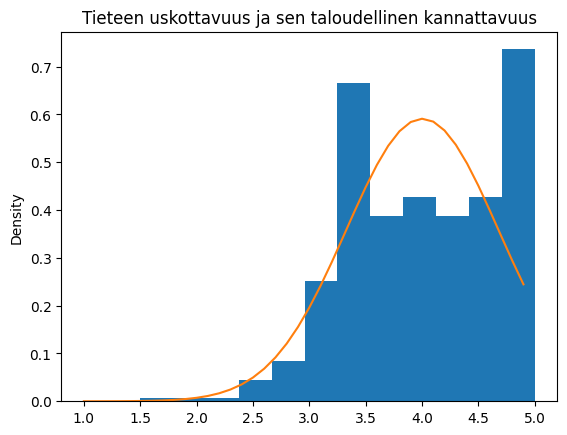

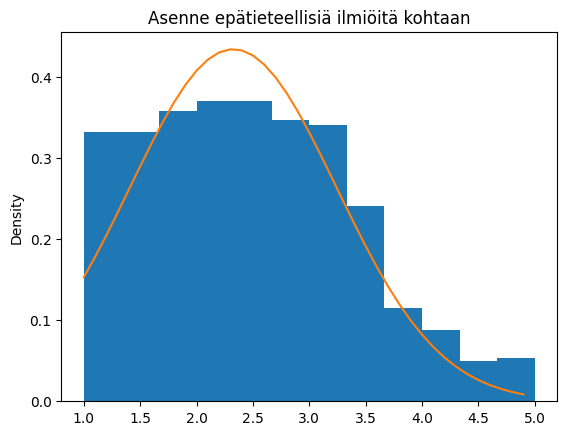

In [18]:
from scipy.stats import norm
x_axis = np.arange(1,5, 0.1)

f1_df["Tieteen uskottavuus ja sen taloudellinen kannattavuus"].plot(kind="hist", bins=12, density=True, title="Tieteen uskottavuus ja sen taloudellinen kannattavuus")
mu_1, std_1 = norm.fit(f1_df["Tieteen uskottavuus ja sen taloudellinen kannattavuus"])
plt.plot(x_axis, norm.pdf(x_axis, mu_1, std_1))
plt.ylabel("Density")
plt.show()

f2_df["Asenne epätieteellisiä ilmiöitä kohtaan"].plot(kind="hist", bins=12, density=True, title="Asenne epätieteellisiä ilmiöitä kohtaan")
mu_2, std_2 = norm.fit(f2_df["Asenne epätieteellisiä ilmiöitä kohtaan"])
plt.plot(x_axis, norm.pdf(x_axis, mu_2, std_2))
plt.ylabel("Density")
plt.show()

Ensimmäisen summamuuttujan (Tieteen uskottavuus ja sen taloudellinen kannattavuus) keskiarvo on 4.0 ja keskihajonta .68. Toisen summamuuttujan (Asenne epätieteellisiä ilmiöitä kohtaan) keskiarvo on 2.3 ja keskihajonta .92. Silmämääräisesti tarkasteltuna, summamuuttujat eivät jakaannu normaalisti.

## Tehtävä 3

Sovelletaan löytämääni summamuuttujaa "Asenne epätieteellisiä ilmiöitä kohtaan", joka periaatteesa vastaa tehtävänannossa annettua summamuuttujaa "Uskomukset vaihtoehtoisia tai ei-tieteellisiä ilmiöitä kohtaan". Tarkastellaan ensin tarkasteltavia muuttujia visuaalisesti.

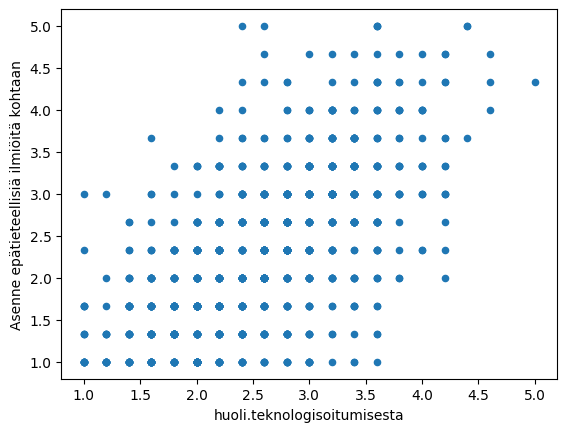

In [19]:
df_huoli_uskomus = pd.DataFrame(df_baro[questions + ["huoli.teknologisoitumisesta"]].dropna()["huoli.teknologisoitumisesta"])
df_huoli_uskomus["Asenne epätieteellisiä ilmiöitä kohtaan"] = f2_df["Asenne epätieteellisiä ilmiöitä kohtaan"]
df_huoli_uskomus = df_huoli_uskomus.dropna()
df_huoli_uskomus.plot(kind="scatter", x="huoli.teknologisoitumisesta", y="Asenne epätieteellisiä ilmiöitä kohtaan")
plt.show()

Scatterplotin perusteella datassa vaikuttaisi olevan trendi, jossa huoli teknologisoitumisesta kasvaa sitä mukaan kun asenne epätieteellisiä ilmiöitä kohtaan kasvaa. Olkoon tämä korrelaatio vaihtoehtoinen hypoteesi. Testataan seuraavaksi nollahypoteesia, eli että korrelaatiota ei olisi. Datan vaiuttaisi olevan joksenkin lineaarista, joten valitaan korrelaation mittariksi Pearsonin _r_.

In [20]:
rstat, pvalue = pearsonr(df_huoli_uskomus["huoli.teknologisoitumisesta"], df_huoli_uskomus["Asenne epätieteellisiä ilmiöitä kohtaan"])
#  print(f"p-value = {pvalue}, Pearson r = {rstat}")

Saatu p-arvo on 0 (häviävän pieni) ja Pearsonin korrelaatiokerroin on _r_ = .61. Voimme siis hylätä nollahypoteesin, eli tilastollisesti merkitsevää korrelaatiota on tarkkailtavien muuttujien välillä (huoli.teknologisoitumisesta ja Asenne epätieteellisiä ilmiöitä kohtaan) ja efektin koko on suuri (_r_ > .5). Tämä tarkoittaa, että Asenne epätieteellisiä ilmiöitä kohtaan kasvaa huolen teknologisoitumisen kasvaessa.

In [21]:
df_huoli_uskomus

,huoli.teknologisoitumisesta,Asenne epätieteellisiä ilmiöitä kohtaan
0,3.2,3.000000
1,2.2,2.666667
2,3.2,2.000000
3,2.6,2.333333
4,2.2,1.666667
...,...,...
1058,1.6,1.000000
1059,2.0,2.333333
1060,2.2,1.000000
1061,2.0,1.333333


In [22]:
questions

['q9_8.uusi',
 'q9_9.uusi',
 'q9_13.uusi',
 'q9_21.uusi',
 'q9_23.uusi',
 'q9_25.uusi',
 'q9_29.uusi',
 'q9_30.uusi',
 'q9_40.uusi']